In [1]:
from diviner import calib
from diviner import file_utils as fu
from diviner import plot_utils as pu

In [8]:
import warnings

warnings.filterwarnings(
    "ignore", "This figure was using constrained_layout==True"
)

In [2]:
%load_ext lab_black

In [4]:
tstr = "2010011318"
tstr = "2010010101"
df = fu.open_and_accumulate(tstr)

In [5]:
c = calib.Calibrator(df)

INFO:diviner.calib:Calibrating from 2010-01-01 00:00:00.290000 to 2010-01-01 02:00:01.102000.


In [6]:
c.calibrate()

INFO:diviner.calib:Performing radiance correction on 2010-01-01 00:00:00.290000


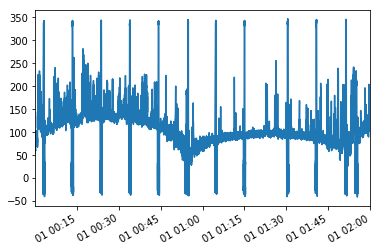

In [9]:
c.Tb.b3_11.plot()

In [10]:
c.Tb.b3_11.max()

346.092293796838

In [11]:
c.interpolate_bb_temps()

In [12]:
c.calc_calib_times()
c.calib_times

AttributeError: 'Calibrator' object has no attribute 'calc_calib_times'

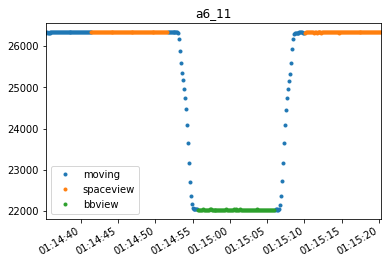

In [14]:
pu.plot_calib_block(df, "calib", 8)

In [17]:
blocks = calib.get_calib_blocks(c.caldata, "calib")
for key, block in blocks.items():
    print(key, len(block))

1 240
2 240
3 240
4 240
5 240
6 400
7 240
8 240
9 240
10 240
11 240
12 240


In [20]:
grouped = c.caldata.groupby(df.calib_block_labels)

In [23]:
def process_calblock(df):
    if len(df) < 240:
        return
    cb = calib.CalBlock(df)
    if cb.kind == "ST":
        return
    return cb.mean_time

In [24]:
grouped.apply(process_calblock).dropna()

AttributeError: 'CalBlock' object has no attribute 'kind'

In [25]:
c.calc_one_RBB()

AttributeError: 'Calibrator' object has no attribute 'calc_one_RBB'

In [ ]:
T_cols = ['bb_1_temp_interp','bb_2_temp_interp']
bbviews_temps = c.df[c.df.is_bbview][T_cols]
grouped = bbviews_temps.groupby(c.df.calib_block_labels)
bbtemps = grouped.agg(c.skipped_mean, c.BBV_NUM_SKIP_SAMPLE)
bbtemps

In [ ]:
bbtemps.reindex(c.calib_times.index)

In [ ]:
c.calc_offsets()